In [1]:
import yfinance as yf

df = yf.download(['btc-usd',
             'bch-usd',
             'ltc-usd',
             'eth-usd'
            ])

[*********************100%***********************]  4 of 4 completed


In [4]:
closes = df['Adj Close'].dropna()

pcts = closes.pct_change()
pcts = (1 + pcts).cumprod() - 1
pcts

,BCH-USD,BTC-USD,ETH-USD,LTC-USD
Date,,,,
2017-07-23,NaN,NaN,NaN,NaN
2017-07-24,0.066918,0.008958,-0.005488,0.007935
2017-07-25,-0.014920,-0.056373,-0.085156,-0.041189
2017-07-26,-0.114376,-0.073597,-0.097357,-0.041452
2017-07-27,-0.066772,-0.021469,-0.095742,-0.043492
...,...,...,...,...
2021-11-16,0.451373,21.033859,17.660529,4.234246
2021-11-17,0.441841,21.109586,17.975768,4.209384
2021-11-18,0.343161,19.854871,16.705834,3.640080


In [7]:
old = closes.values[0]
new = closes.values[-1]

returns = (new - old) / old
returns

array([ 0.39970314, 20.42615255, 17.9270802 ,  4.00332479])

In [9]:
total_return_pct = returns.dot(.25).sum() * 100
total_return_pct

1068.9065171606408

In [17]:
import datetime as dt

duration = (dt.datetime.now() - dt.datetime(2017,7,23,0,0,0,0))
days = duration.days

In [19]:
dur_days = (dt.datetime.now() - closes.index[0]).days #More precise...
ann_return = total_return_pct / (days / 365)
print(f'Crypto Index -- Annualized returns {round(ann_return,2)}%')

Crypto Index -- Annualized returns 246.93%


In [81]:
pct = pcts.apply(lambda x: x.sum(), axis=1).dropna()

In [33]:
pcts = pcts.dropna()
total_return = pcts['BCH-USD'] + pcts['BTC-USD'] + pcts['ETH-USD'] + pcts['LTC-USD']
total_return

Date
2017-07-24     0.078323
2017-07-25    -0.197637
2017-07-26    -0.326782
2017-07-27    -0.227476
2017-07-28    -0.211590
                ...    
2021-11-16    43.380006
2021-11-17    43.736579
2021-11-18    40.543945
2021-11-19    42.654194
2021-11-20    42.756261
Length: 1577, dtype: float64

In [36]:
return_curve = pcts.apply(lambda x: x.mean(), axis=1)

In [39]:
return_100k = return_curve * 100000

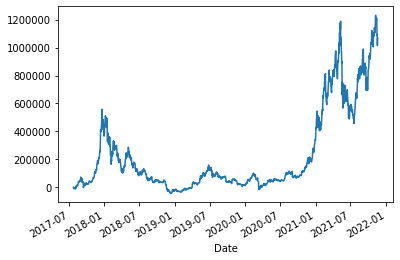

In [41]:
return_100k.plot()

In [47]:
### PLOT the DCA version !T
# http://www.samansari.info/2016/01/lump-sum-vs-dollar-cost-averaging-dca.html
## Break down by month... so 12 * years, or 4 -- 48 months.
thousand_per_month = 100 / 52

In [48]:
## 52 months of DCA
'''
def doDCA(investment, start_date):
    # Get 12 investment dates in 30 day increments starting from start date
    investment_dates_all = pd.date_range(start_date,periods=12,freq='30D')
    # Remove those dates beyond our known data range
    investment_dates = investment_dates_all[investment_dates_all < end]

    # Get closest business dates with available data
    closest_investment_dates = spy.index.searchsorted(investment_dates)

    # How much to invest on each date
    portion = investment/12

    # Get the total of all stocks purchased for each of those dates (on the Close)
    stocks_invested = sum(portion / spy.Close[closest_investment_dates])

    # Add uninvested amount back
    uninvested_dollars = portion * sum(investment_dates_all >= end)

    # value of stocks today
    total_value = value_price*stocks_invested + uninvested_dollars
    return total_value
'''

"\ndef doDCA(investment, start_date):\n    # Get 12 investment dates in 30 day increments starting from start date\n    investment_dates_all = pd.date_range(start_date,periods=12,freq='30D')\n    # Remove those dates beyond our known data range\n    investment_dates = investment_dates_all[investment_dates_all < end]\n\n    # Get closest business dates with available data\n    closest_investment_dates = spy.index.searchsorted(investment_dates)\n\n    # How much to invest on each date\n    portion = investment/12\n\n    # Get the total of all stocks purchased for each of those dates (on the Close)\n    stocks_invested = sum(portion / spy.Close[closest_investment_dates])\n\n    # Add uninvested amount back\n    uninvested_dollars = portion * sum(investment_dates_all >= end)\n\n    # value of stocks today\n    total_value = value_price*stocks_invested + uninvested_dollars\n    return total_value\n"

In [ ]:
def doDCA(investment, start_date):
    # Get 12 investment dates in 30 day increments starting from start date
    investment_dates_all = pd.date_range(start_date,periods=52,freq='30D')
    # Remove those dates beyond our known data range
    investment_dates = investment_dates_all[investment_dates_all < end]

    # Get closest business dates with available data
    closest_investment_dates = spy.index.searchsorted(investment_dates)

    # How much to invest on each date
    portion = investment/12

    # Get the total of all stocks purchased for each of those dates (on the Close)
    stocks_invested = sum(portion / spy.Close[closest_investment_dates])

    # Add uninvested amount back
    uninvested_dollars = portion * sum(investment_dates_all >= end)

    # value of stocks today
    total_value = value_price*stocks_invested + uninvested_dollars
    return total_value

# Generate DCA series for every possible date
dca = pd.Series(spy.index.map(lambda x: doDCA(initial_investment, x)), index=spy.index, name='Dollar Cost Averaging (DCA)')

In [109]:
import pandas as pd
start_date = closes.index[0]
pd.date_range(start_date,periods=52,freq='30D')

inv_dates = pd.date_range(start_date,periods=52,freq='30D')

portion = 100000 / 52



## USE total_return here, not pcts...
#START with initial amount invested...
inv = []
alloc = portion
for i in pcts.itertuples():
    #print(i.Index in inv_dates)
    
    
    ## SAVE prior dates return, to date ? 
    
    if i.Index in inv_dates:
        alloc = alloc + portion
        print(f'Investment date, adding {portion} to alloc -- Total: {alloc}')
        
        
        
        ##MULTIPLY here... make a fractal calc. At each step, calculate the PRIOR periods return to that moment...
        ## THIS is cumulative return, so to THAT moment, the return is new - old / old * prior inv amount (NOT the next inv amount)
        
    inv.append(alloc)

Investment date, adding 1923.076923076923 to alloc -- Total: 3846.153846153846
Investment date, adding 1923.076923076923 to alloc -- Total: 5769.2307692307695
Investment date, adding 1923.076923076923 to alloc -- Total: 7692.307692307692
Investment date, adding 1923.076923076923 to alloc -- Total: 9615.384615384615
Investment date, adding 1923.076923076923 to alloc -- Total: 11538.461538461539
Investment date, adding 1923.076923076923 to alloc -- Total: 13461.538461538463
Investment date, adding 1923.076923076923 to alloc -- Total: 15384.615384615387
Investment date, adding 1923.076923076923 to alloc -- Total: 17307.69230769231
Investment date, adding 1923.076923076923 to alloc -- Total: 19230.76923076923
Investment date, adding 1923.076923076923 to alloc -- Total: 21153.846153846152
Investment date, adding 1923.076923076923 to alloc -- Total: 23076.923076923074
Investment date, adding 1923.076923076923 to alloc -- Total: 24999.999999999996
Investment date, adding 1923.076923076923 to 

In [75]:
DCA = pd.DataFrame({'return':total_return.values, 'invested':inv}) #WITH CumProd, this is wrong...

#dca = pd.DataFrame({'ret':pcts.values, 'inv':inv})

In [110]:
### USE true pct_change (sum) ------------- THIS is doable here, cant think of HOW though. cumsum? 
pcts

,BCH-USD,BTC-USD,ETH-USD,LTC-USD
Date,,,,
2017-07-24,0.066918,0.008958,-0.005488,0.007935
2017-07-25,-0.014920,-0.056373,-0.085156,-0.041189
2017-07-26,-0.114376,-0.073597,-0.097357,-0.041452
2017-07-27,-0.066772,-0.021469,-0.095742,-0.043492
2017-07-28,-0.016981,0.028791,-0.145288,-0.078112
...,...,...,...,...
2021-11-16,0.451373,21.033859,17.660529,4.234246
2021-11-17,0.441841,21.109586,17.975768,4.209384
2021-11-18,0.343161,19.854871,16.705834,3.640080


In [71]:
DCA['USD_Return'] = DCA['return'] * DCA.invested
DCA

,return,invested,USD_Return
0,0.078323,1923.076923,1.506221e+02
1,-0.197637,1923.076923,-3.800716e+02
2,-0.326782,1923.076923,-6.284273e+02
3,-0.227476,1923.076923,-4.374542e+02
4,-0.211590,1923.076923,-4.069042e+02
...,...,...,...
1572,43.380006,100000.000000,4.338001e+06
1573,43.736579,100000.000000,4.373658e+06
1574,40.543945,100000.000000,4.054395e+06
1575,42.654194,100000.000000,4.265419e+06


In [79]:
pcts.apply(lambda x: x.sum(), axis=1)

Date
2017-07-24     0.078323
2017-07-25    -0.197637
2017-07-26    -0.326782
2017-07-27    -0.227476
2017-07-28    -0.211590
                ...    
2021-11-16    43.380006
2021-11-17    43.736579
2021-11-18    40.543945
2021-11-19    42.654194
2021-11-20    42.756261
Length: 1577, dtype: float64

In [82]:
inv = []
alloc = portion
for i in pcts.itertuples():
    #print(i.Index in inv_dates)
    
    
    ## SAVE prior dates return, to date ? 
    
    if i.Index in inv_dates:
        alloc = alloc + portion
        print(f'Investment date, adding {portion} to alloc -- Total: {alloc}')
        
        
        #IF date to UPGRADE inv amount... take prior 30 day return, (current value, - value 30 back...) * the alloc value.
        #frac_ret = 
        ##MULTIPLY here... make a fractal calc. At each step, calculate the PRIOR periods return to that moment...
        ## THIS is cumulative return, so to THAT moment, the return is new - old / old * prior inv amount (NOT the next inv amount)
        
    inv.append(alloc)

Date
2017-07-24     0.078323
2017-07-25    -0.197637
2017-07-26    -0.326782
2017-07-27    -0.227476
2017-07-28    -0.211590
                ...    
2021-11-16    43.380006
2021-11-17    43.736579
2021-11-18    40.543945
2021-11-19    42.654194
2021-11-20    42.756261
Length: 1577, dtype: float64

In [107]:
import math

p = pct.to_frame()
p.columns = ['ret']
p['prior'] = p.ret.shift(30)

cum_ret = []
alloc = portion

for i in p.itertuples():
    if i.Index in inv_dates:
        
        #Segment return is CURRENT (cum) return, less PRIOR return... (30 day back return) --- then multiply by allocation amount for USD return.
        fract_ret = i.ret - i.prior if not math.isnan(i.prior) else i.ret
        usd_ret = fract_ret * alloc
        #print(fract_ret,i.prior)
        cum_ret.append(usd_ret)
        
        #Upgrade the amount invested (by another chunk)
        alloc += portion 

In [117]:
cum_ret

import numpy as np
np.cumsum(cum_ret)[-1]


2194953.931196289

In [119]:
p.ret.values[-1] * 100000 #NOT DCA...

4275626.068642565

In [145]:
p.ret.values * inv


base_pcts = closes.pct_change()
base_pcts = base_pcts.dropna().apply(lambda x: x.sum(), axis=1)

df = base_pcts.to_frame().rename(columns={0:'day_returns'})
df['inv'] = inv
df['dca_ret'] = df.inv * df.day_returns 
df['base_ret'] = df.day_returns * 100000
df

,day_returns,inv,dca_ret,base_ret
Date,,,,
2017-07-24,0.078323,1923.076923,150.622066,7832.347422
2017-07-25,-0.270301,1923.076923,-519.808862,-27030.060803
2017-07-26,-0.132827,1923.076923,-255.437343,-13282.741819
2017-07-27,0.109681,1923.076923,210.925086,10968.104461
2017-07-28,0.013731,1923.076923,26.406354,1373.130403
...,...,...,...,...
2021-11-16,-0.350058,100000.000000,-35005.827927,-35005.827927
2021-11-17,0.009013,100000.000000,901.289345,901.289345
2021-11-18,-0.301398,100000.000000,-30139.836839,-30139.836839


In [152]:
df['dca_total'] = df.dca_ret.cumsum()
df['base_total'] = df.base_ret.cumsum()

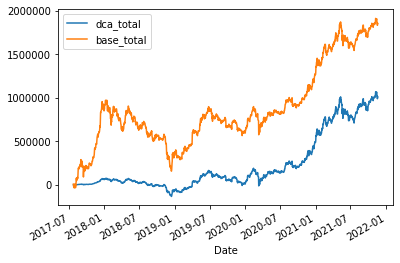

In [155]:
compared = df[['dca_total','base_total']]
compared.plot()

## Build out a Calmar Ratio, or MDD -- thats where this will truly shine.

In [172]:
## TOTAL is CUMULATIVE
df2 = df.rename(columns={'base_total':'base_cum', 'dca_total':'dca_cum'})

In [249]:
dca = df2[['dca_ret','dca_cum']]
dca['max_so_far'] = dca.dca_cum.cummax()
dca['DD'] = dca.dca_cum - dca.max_so_far
dca['DD_pct'] = dca.DD / dca.dca_cum

C:\Users\zach\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zach\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zach\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [250]:
dca.loc[dca['DD'] == dca.DD.min()].index


peak_at_mdd = dca.loc['2021-07-20'].max_so_far
mdd_pct = dca.DD.min() / peak_at_mdd 

In [253]:
dca['MDD_pct'] = dca.DD.min() / dca.max_so_far

dca.MDD_pct

dca_mdd = dca.MDD_pct.values[-1]
dca_mdd

-0.2813246587925867

In [244]:
## BASE mdd...

bse = df2[['base_ret','base_cum']]
bse['max_so_far'] = bse.base_cum.cummax()
bse['DD'] = bse.base_cum - bse.max_so_far
bse['MDD_pct'] = bse.DD.min() / bse.max_so_far
base_mdd = bse.MDD_pct.values[-1]

C:\Users\zach\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\zach\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zach\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [257]:
print(f'MDD (DCA) -- {dca_mdd}, MDD (Base) {base_mdd} ')


print('Using DCA -- Crypto has a lower DD than equities in the same period !!')
print(f'Using DCA improves drawdown by {(base_mdd - dca_mdd) / base_mdd}% --- removing over 1/3 of the worst case drawdown!')

MDD (DCA) -- -0.2813246587925867, MDD (Base) -0.4266313784684564 
Using DCA -- Crypto has a lower DD than equities in the same period !!
Using DCA improves drawdown by 0.34059079338584825%
